# Bandwidths 

Based on kde_tutorial from https://notebooks.gesis.org/binder/jupyter/user/saint-germain-p-ation_synthesis-uu00810x/tree/prep

In [1]:
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import warnings
warnings.simplefilter('ignore')

In [4]:
dn=pd.read_csv('proc_no_pert.csv',index_col=None) #without pertubtations 
dn["gia"]=dn.ngi>0
dl=pd.read_csv('proc_lo_pert.csv',index_col=None) #with low pertubtations 
dl["gia"]=dl.ngi>0
dh=pd.read_csv('proc_hi_pert.csv',index_col=None) #with high pertubtations 
dh["gia"]=dh.ngi>0

In [5]:
#Terrestrial
dnt=dn[~dn["gia"]] # without pertubtations 
dlt=dl[~dl["gia"]] # low pertubtations 
dht=dh[~dh["gia"]] # high pertubtations 

#Giant 
dng=dn[dn["gia"]]  # without pertubtations 
dlg=dl[dl["gia"]]  # low pertubtations 
dhg=dh[dh["gia"]]  # high without pertubtations 

In [6]:
print("***************************************")
print("Total systems                  : "+str(len(dn)))
print("***************************************")
print("Total planets - no             : "+str(dn.nplanets.sum().astype(int)))
print("Giant planets - no             : "+str(dn.ngi.sum().astype(int)))
print("Systems with giant planets - no: "+str(dn.gia.sum()))
print("***************************************")

print("Total planets - lo             : "+str(dl.nplanets.sum().astype(int)))
print("Giant planets - lo             : "+str(dl.ngi.sum().astype(int)))
print("Systems with giant planets - lo: "+str(dl.gia.sum()))
print("***************************************")
print("Total planets - hi             : "+str(dh.nplanets.sum().astype(int)))
print("Giant planets - hi             : "+str(dh.ngi.sum().astype(int)))
print("Systems with giant planets - hi: "+str(dh.gia.sum()))

***************************************
Total systems                  : 1221
***************************************
Total planets - no             : 15887
Giant planets - no             : 330
Systems with giant planets - no: 268
***************************************
Total planets - lo             : 15732
Giant planets - lo             : 374
Systems with giant planets - lo: 306
***************************************
Total planets - hi             : 15441
Giant planets - hi             : 388
Systems with giant planets - hi: 309


Some important variables: 

In [7]:
#log_10 of mass efficiency and center of mass
#log_10 mass efficiency giant and terrestrial 
dng['logeff']=np.log10(dng.massefficiency)
dlg['logeff']=np.log10(dlg.massefficiency)
dhg['logeff']=np.log10(dhg.massefficiency)
dnt['logeff']=np.log10(dnt.massefficiency)
dlt['logeff']=np.log10(dlt.massefficiency)
dht['logeff']=np.log10(dht.massefficiency)#
#log_10 total mass efficiency
dn['logeff']=np.log10(dn.massefficiency)
dl['logeff']=np.log10(dl.massefficiency)
dh['logeff']=np.log10(dh.massefficiency)

#log_10 total com
dn['logcom']=np.log10(dn.com)
dl['logcom']=np.log10(dl.com)
dh['logcom']=np.log10(dh.com)

#log_10 com giant and terrestrial 
dng['logcom']=np.log10(dng.com)
dlg['logcom']=np.log10(dlg.com)
dhg['logcom']=np.log10(dhg.com)
dnt['logcom']=np.log10(dnt.com)
dlt['logcom']=np.log10(dlt.com)
dht['logcom']=np.log10(dht.com)

In [8]:
dng.head()

,Unnamed: 0,ident,com,nplanets,massbudget,massefficiency,sigmag0,md,rc,ms,metal,taugas,qest,ngi,mtr,apert,gia,logeff,logcom
0,0,3.0,1.081461,10.0,10770.309627,0.576981,90.793337,0.056,29.539343,0.880114,0.328146,1644710.625,8.421395,4.0,12.004623,0.0,True,-0.238839,0.034011
2,2,6.0,0.110789,12.0,2422.342359,0.060559,75.740878,0.120,47.343380,0.861595,0.021273,1790533.125,4.412694,1.0,29.771089,0.0,True,-1.217824,-0.955504
4,4,13.0,0.172211,13.0,2905.457535,0.051273,178.830700,0.170,36.672222,1.206445,-0.174039,3956707.500,3.998513,1.0,14.220447,0.0,True,-1.290113,-0.763939
16,16,31.0,4.377862,11.0,41.578462,0.001299,86.546084,0.096,39.613728,0.993549,-0.031508,1439538.875,5.991912,1.0,17.716253,0.0,True,-2.886282,0.641262
23,23,40.0,2.144859,13.0,181.982608,0.006578,57.698437,0.083,45.111870,1.037112,0.039315,2374519.750,7.413428,1.0,14.782324,0.0,True,-2.181927,0.331399


## Bandwidth problem

an example with kernel density

In [9]:
# an example with kernel density
x=dng.ngi
grid = GridSearchCV(KernelDensity(), 
                    {'bandwidth': np.linspace(x.min(),x.max()/10,30)},
                    cv=50) # 20-fold cross-validation
grid.fit(x[:, None])
print(grid.best_params_)

# other example with gaussian_kde method. 
from scipy.stats import gaussian_kde
kde = gaussian_kde(x)
f = kde.covariance_factor()
bw = f * x.std()
print("bw g_kde: "+str(bw))

{'bandwidth': 0.4}
bw g_kde: 0.17399675736725956


A comparison plot

(array([2.71144279, 0.        , 0.        , 0.49751244, 0.        ,
        0.        , 0.09950249, 0.        , 0.        , 0.02487562]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <a list of 10 Patch objects>)

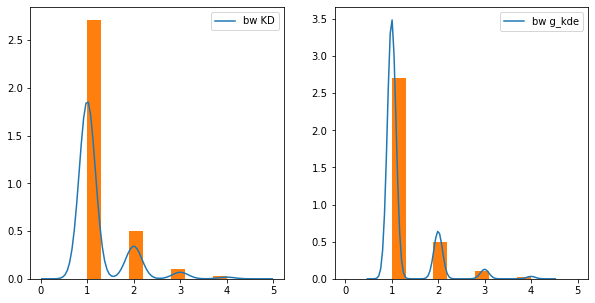

In [10]:
f, axes = plt.subplots(1, 2, figsize=(10, 5), sharex=True)
sns.kdeplot(dng.ngi,bw=.32688, ax=axes[0], label="bw KD"); axes[0].hist(dng.ngi, density=True)
sns.kdeplot(dng.ngi,bw=bw, ax=axes[1],label="bw g_kde"); axes[1].hist(dng.ngi, density=True)

Now, a function to compare this methods: 

In [20]:
x_variables = [dng,dlg,dhg,dnt,dlt,dht,dn,dl,dh]
#columns     = [str(logeff), str(logcom)]

def bw_optimal(variables, eff=False, plot=False): 
    bw_optimal_CV, bw_optimal_kde = [],[]
    norm, size, cv = 10, 30, 20 # 20-fold cross-validation
    
    for index,variable in enumerate(variables):
        #-------------Variable: 
        if eff==True:
            x = variable.logeff/variable.logeff.min() # logeff column
        else:
            x = variable.logcom/variable.logcom.min() # logcom column
        #-------------With C]rossValidation:
        grid = GridSearchCV(KernelDensity(), 
                            {'bandwidth': np.linspace(x.min(),x.max()/norm,size)}, 
                            cv=cv)
        grid.fit(x[:, None])
        bw_CV = list(grid.best_params_.values())[0]
        bw_optimal_CV.append(bw_CV)
        #-------------Gaussian_KDE:
        kde = gaussian_kde(x)
        f = kde.covariance_factor()
        bw_KDE =  f * x.std()
        bw_optimal_kde.append(f * x.std())
        
        #-------------Plot
        if plot == True: 
            
            fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharex=True)
            sns.kdeplot(x,bw=bw_CV, ax=axes[0], label="bw_CV "+str('%.5f' % bw_CV)); axes[0].hist(x, density=True)
            sns.kdeplot(x,bw=bw_KDE, ax=axes[1],label="bw G_kde "+str('%.5f' % bw_KDE)); axes[1].hist(x, density=True)
            plt.show()
        
    return bw_optimal_CV, bw_optimal_kde

The comparative plot for the log_10 of efficiency

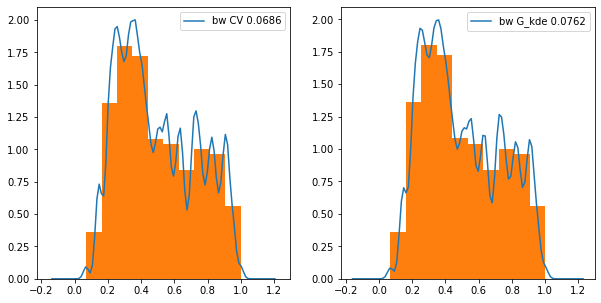

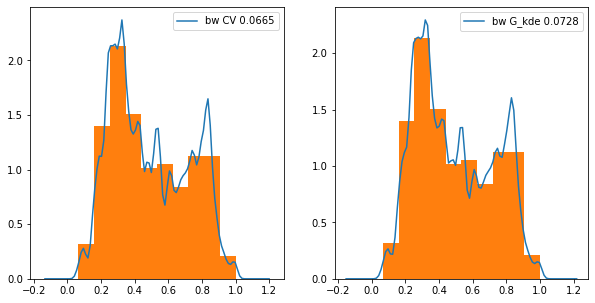

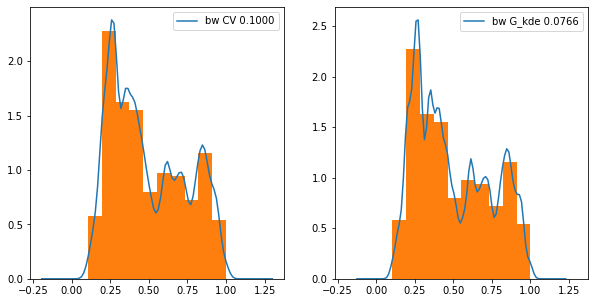

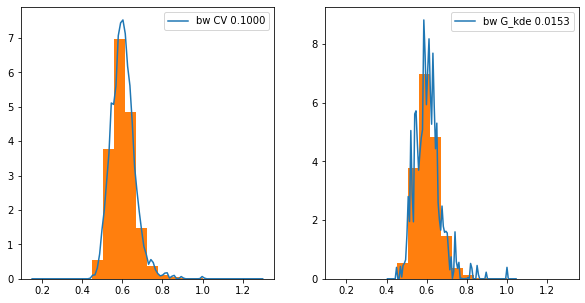

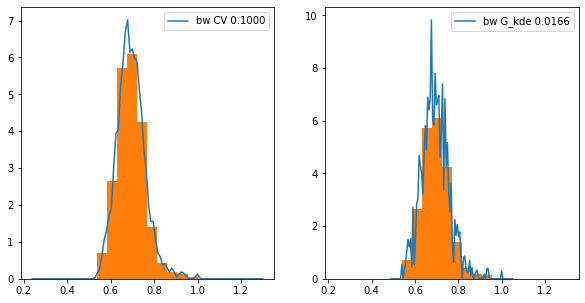

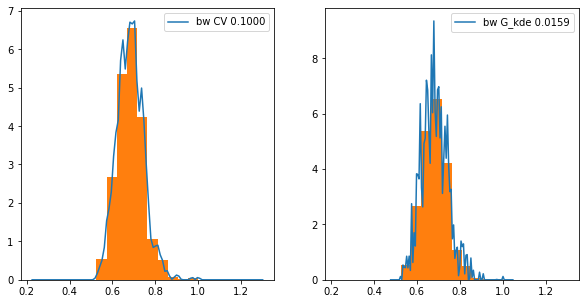

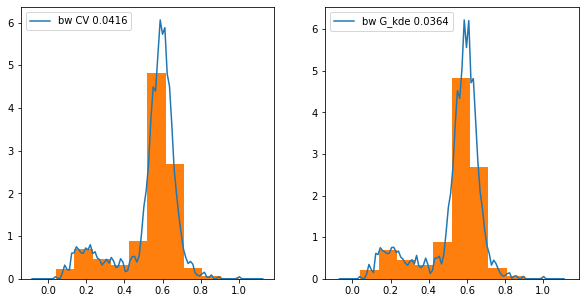

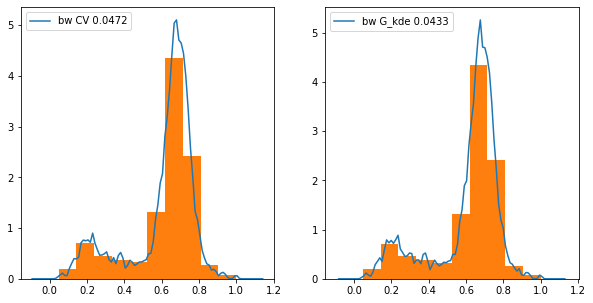

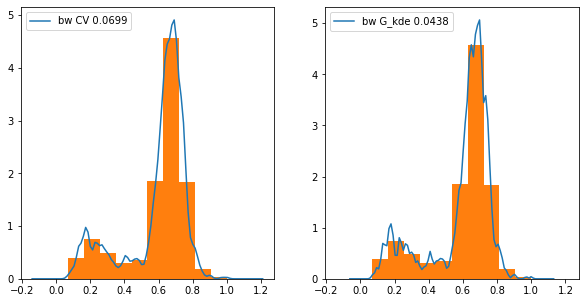

In [21]:
#%%time
bw_eff = bw_optimal(x_variables, True, True)

In [13]:
#The optimal bw values of logeff (CrossValudation, kde) 
bw_eff

([0.06861681279645619,
  0.06651027180474715,
  0.1,
  0.1,
  0.1,
  0.1,
  0.04159322848746282,
  0.04718116625880585,
  0.06989983400956606],
 [0.07616826615220967,
  0.07283586344782506,
  0.0766064903211836,
  0.01528846088540147,
  0.016623501511828866,
  0.015880643899511,
  0.03638012506581476,
  0.043349312602960134,
  0.04384632923104626])

For the log of com

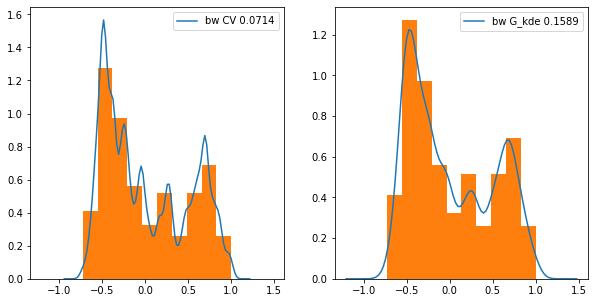

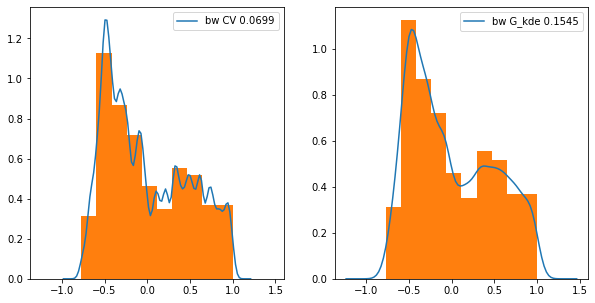

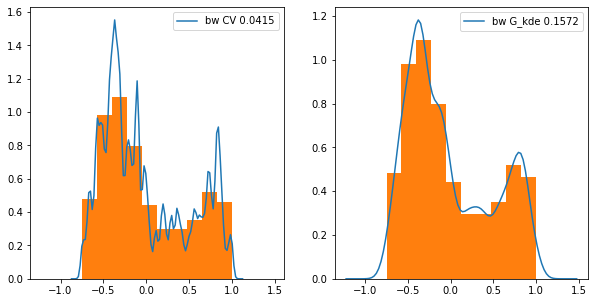

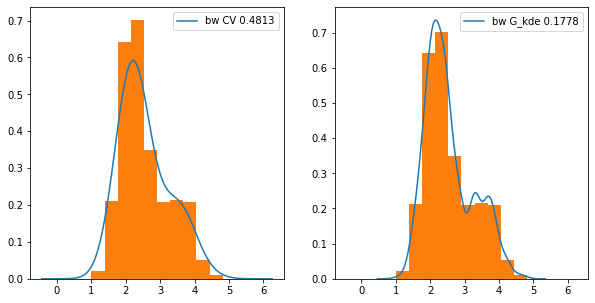

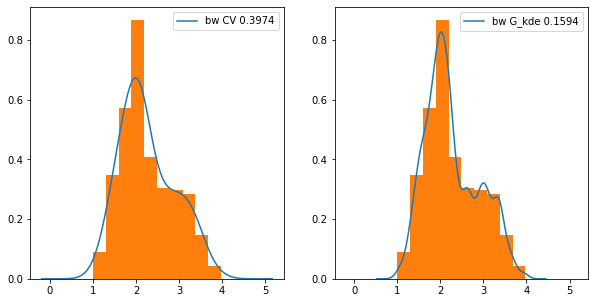

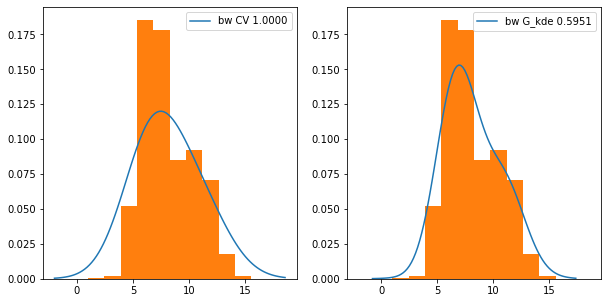

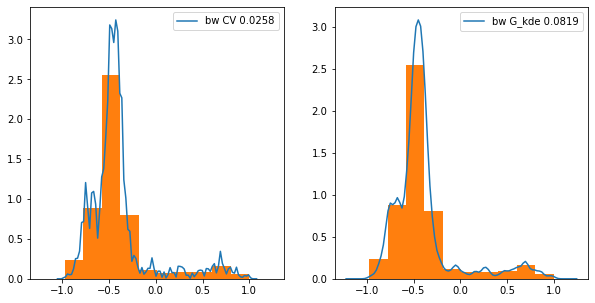

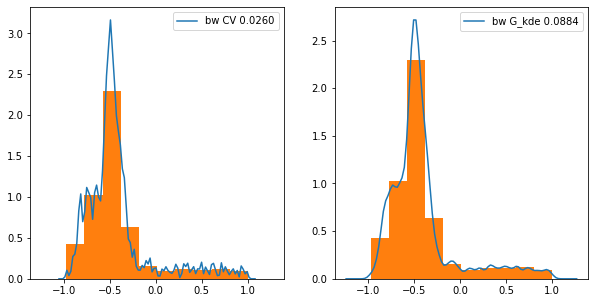

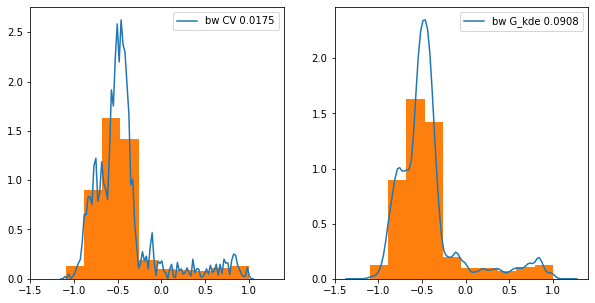

In [22]:
bw_com = bw_optimal(x_variables, False, True)

In [15]:
#The optimal bw values of logcom (CrossValudation, kde) 
bw_com

([0.07140279717640774,
  0.06993309973374395,
  0.04154547841437617,
  0.4813157550519249,
  0.3974111948753966,
  1.0,
  0.025825402055604574,
  0.0260207604706838,
  0.01745551700503123],
 [0.1588617608784711,
  0.15453766228836457,
  0.1572150173160283,
  0.17780167968100538,
  0.15939005381726612,
  0.5951195269756075,
  0.08187177189686096,
  0.08838561747144029,
  0.09084218165688714])

## 3D and bandwith for more dimensions